# 1 Introduction

## 1.1 Some Examples

**Question:** What is a time series?  
**Answer:** It is a random sequence $\{X_t\}$ recorded in a time-ordered fashion.

**Question:** What are its applications?  
**Answer:** Everywhere when data are observed in a time-ordered fashion. For example:

- **Economics:** Daily stock market quotations or monthly unemployment rates.  
- **Social sciences:** Population series, such as birthrates or school enrollments.  
- **Epidemiology:** The number of influenza cases observed over some time period.  
- **Medicine:** Blood pressure measurements traced over time for evaluating drugs.  

**Example 1.1. (Johnson & Johnson Quarterly Earnings)**  
Figure 1.1 shows quarterly earnings per share for the U.S. company Johnson & Johnson.

- 84 quarters (21 years) measured from the 1st quarter of 1960 to the last quarter of 1980.

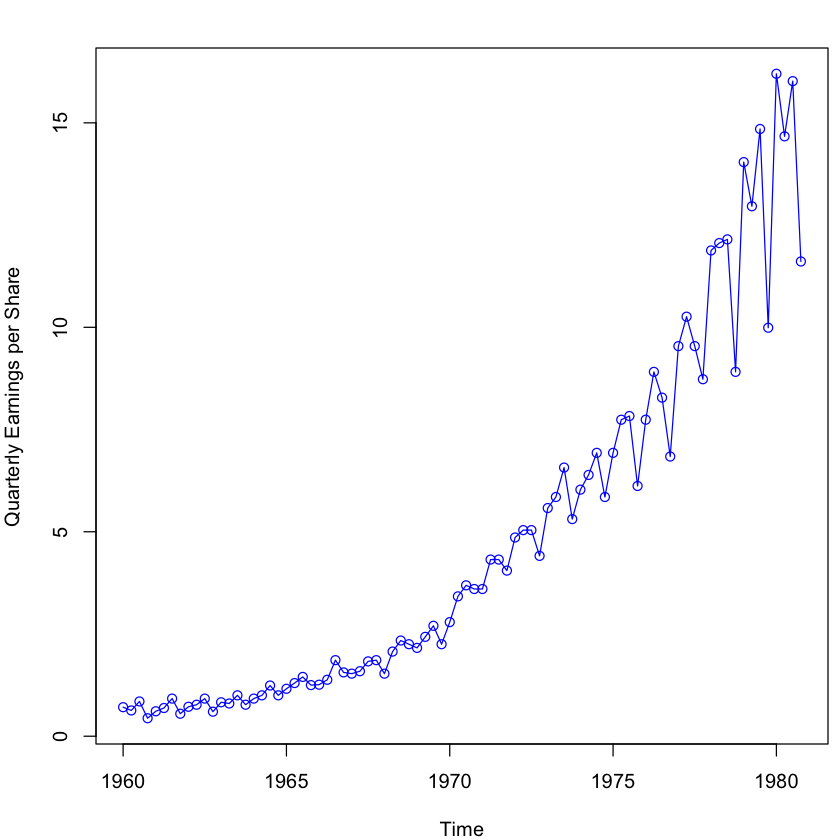

In [3]:
require(astsa)
par(mar = c(4, 4, 2, .5), bg = "white")  # Set background to white
plot(jj, type = "o", ylab = "Quarterly Earnings per Share", col = "blue")


**Example 1.2. (Global Warming)**  
Figure 1.2 shows the global mean land-ocean temperature index from 1850 to 2023, with the base period 1951–1980.

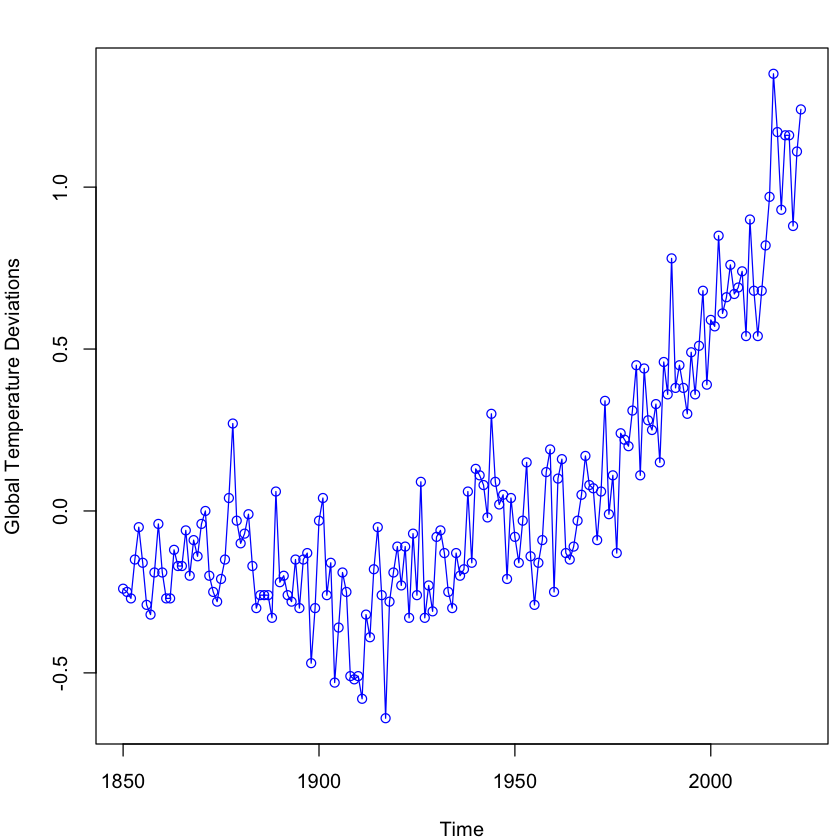

In [17]:
par(mar = c(4, 4, 2, .5), bg = "white")
gtemp <- gtemp_both
plot(gtemp, type = "o", ylab = "Global Temperature Deviations", col = "blue")


**Example 1.3. (Speech Data)**  
Figure 1.3 shows a small 0.1 second (1000 point) sample of recorded speech for the phrase *aaa···hhh*.


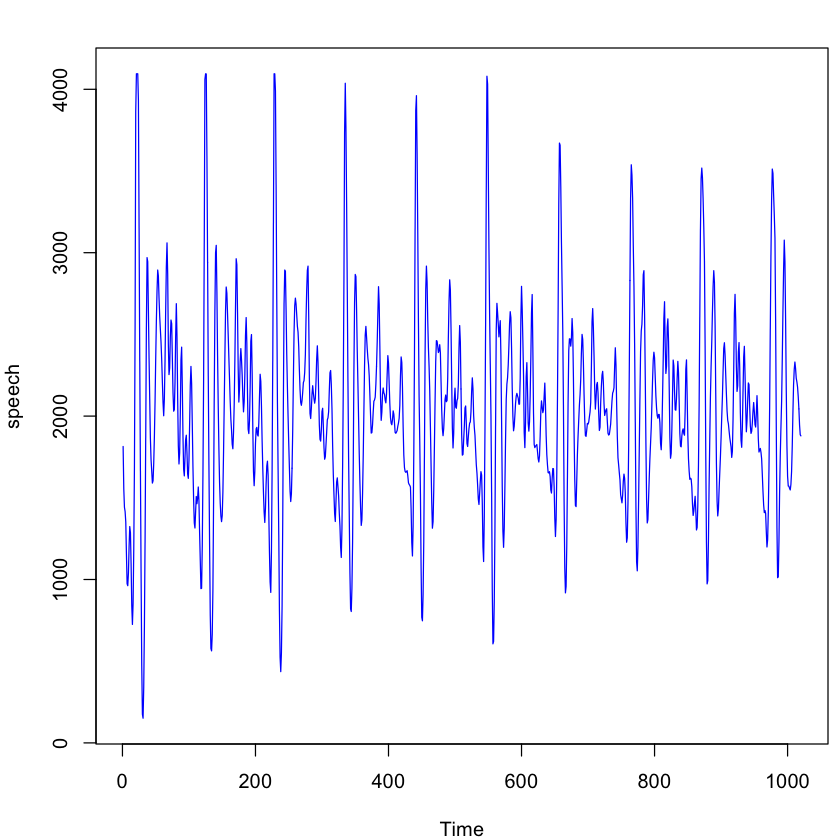

In [ ]:
par(mar = c(4, 4, 2, .5), bg = "white") # Set background to white
plot(speech, col = "blue")

Figure 1.4: Top: One realization of a binary process (left) and a Gaussian noise (right). Bottom:
the corresponding random walk

Computer recognition of speech: use spectral analysis to produce a signature of this phrase and then
compare it with signatures of various library syllables to look for a match.

## 1.2 Time Series Statistical Models

A time series model specifies the joint distribution of the sequence $\{X_t\}$ of random variables; e.g.,

$$
P(X_1 \le x_1, \ldots, X_t \le x_t) \quad \text{for all } t \text{ and } x_1, \ldots, x_t,
$$

where $\{X_1, X_2, \ldots\}$ is a stochastic process, and $\{x_1, x_2, \ldots\}$ is a single realization. Through this course, we will mostly restrict our attention to the first- and second-order properties only:
$$
\mathbb{E}(X_t), \quad \text{Cov}(X_{t_1}, X_{t_2}).
$$

Typically, a time series model can be described as:

$$
X_t = m_t + s_t + Y_t, \tag{1.1}
$$

where:
- $m_t$: trend component;
- $s_t$: seasonal component;
- $Y_t$: zero-mean error.

The following are some zero-mean models:

**Example 1.4 (iid noise)**:  
The simplest time series model is the one with no trend or seasonal component, and the observations $X_t$ are simply independent and identically distributed (iid) random variables with zero mean. Such a sequence $\{X_t\}$ is referred to as iid noise. Mathematically, for any $t$ and $x_1, \ldots, x_t$,

$$
P(X_1 \le x_1, \ldots, X_t \le x_t) = \prod_{t} P(X_t \le x_t) = \prod_{t} F(x_t),
$$

where $F(\cdot)$ is the cumulative distribution function (cdf) of each $X_t$. Further, $\mathbb{E}(X_t) = 0$ for all $t$. We denote such a sequence as:

$$
X_t \sim \text{IID}(0, \sigma^2).
$$

IID noise is not interesting for forecasting since $X_t \mid X_1, \ldots, X_{t-1} = X_t$.

**Example 1.5 (A binary discrete process)**:  
As an example of iid noise, a binary process $\{X_t\}$ is a sequence of iid random variables $X_t$ with:

$$
P(X_t = 1) = 0.5, \quad P(X_t = -1) = 0.5.
$$

**Example 1.6 (A continuous process: Gaussian noise)**:  
$\{X_t\}$ is a sequence of iid normal random variables with zero mean and variance $\sigma^2$; i.e.,

$$
X_t \sim \mathcal{N}(0, \sigma^2) \quad \text{iid}.
$$

**Example 1.7 (Random walk)**:  
The random walk $\{S_t, t = 0, 1, 2, \ldots\}$ (starting at zero, $S_0 = 0$) is obtained by cumulatively summing (or "integrating") random variables; i.e., $S_0 = 0$ and

$$
S_t = X_1 + \cdots + X_t, \quad \text{for } t = 1, 2, \ldots,
$$

where $\{X_t\}$ is iid noise with zero mean and variance $\sigma^2$. By differencing, we can recover $X_t$:

$$
\nabla S_t = S_t - S_{t-1} = X_t.
$$

Further, we have:

$$
\mathbb{E}(S_t) = \mathbb{E} \left( \sum_{i=1}^{t} X_i \right) = \sum_{i=1}^{t} \mathbb{E}(X_i) = \sum_{i=1}^{t} 0 = 0,
$$

$$
\text{Var}(S_t) = \text{Var} \left( \sum_{i=1}^{t} X_i \right) = \sum_{i=1}^{t} \text{Var}(X_i) = t\sigma^2.
$$


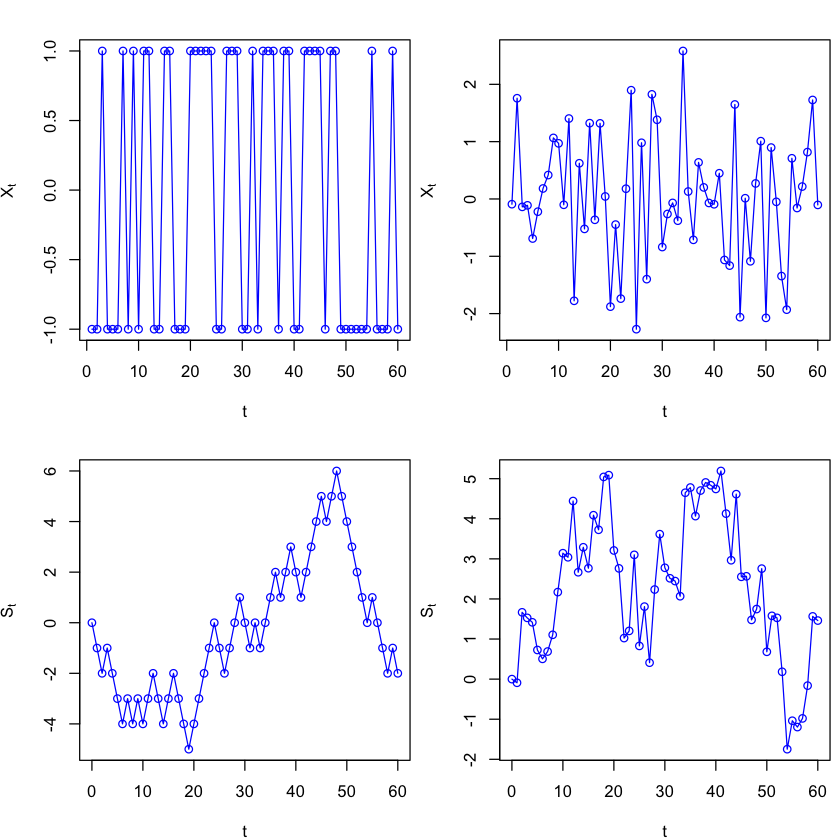

In [11]:
# Set random seed for reproducibility
set.seed(100)

# Set up a 2x2 plotting layout and define plot background/margins
par(mfrow = c(2, 2), bg = "white")
par(mar = c(4, 4, 2, 0.5))

# Time sequence
t <- seq(1, 60, by = 1)

# 1. Generate a Bernoulli process {-1, +1}
xt1 <- rbinom(length(t), 1, 0.5) * 2 - 1
plot(t, xt1, type = "o", col = "blue", xlab = "t", ylab = expression(X[t]))

# 2. Generate a standard normal (Gaussian white noise) process
xt2 <- rnorm(length(t), mean = 0, sd = 1)
plot(t, xt2, type = "o", col = "blue", xlab = "t", ylab = expression(X[t]))

# 3. Cumulative sum of Bernoulli process = random walk
plot(c(0, t), c(0, cumsum(xt1)), type = "o", col = "blue", xlab = "t", ylab = expression(S[t]))

# 4. Cumulative sum of Gaussian process = Brownian-like motion
plot(c(0, t), c(0, cumsum(xt2)), type = "o", col = "blue", xlab = "t", ylab = expression(S[t]))



Figure 1.4: Top: One realization of a binary process (left) and a Gaussian noise (right). Bottom:
the corresponding random walk

**Example 1.8 (White Noise).**  
We say $\{X_t\}$ is a white noise, i.e., $X_t \sim \text{WN}(0, \sigma^2)$, if $\{X_t\}$ is uncorrelated, i.e.,  
$$
\text{Cov}(X_{t_1}, X_{t_2}) = 0 \quad \text{for any } t_1 \neq t_2,
$$  
with $\mathbb{E}[X_t] = 0$, $\text{Var}(X_t) = \sigma^2$.

Note that every $\text{IID}(0, \sigma^2)$ sequence is $\text{WN}(0, \sigma^2)$, but not conversely.

**Example 1.9 (An Example of White Noise but Not IID Noise).**  
Define $X_t = Z_t$ when $t$ is odd, and $X_t = \sqrt{3} Z_{t-1}^2 - \frac{2}{\sqrt{3}} \quad \text{when } t \text{ is even},$  
where $\{Z_t, \, t = 1, 3, \ldots\}$ is an IID sequence from a distribution with probability mass function:  
$$
f_Z(-1) = \frac{1}{3}, \quad f_Z(0) = \frac{1}{3}, \quad f_Z(1) = \frac{1}{3}.
$$

It can be seen that $\mathbb{E}[X_t] = 0$, $\text{Var}(X_t) = \frac{2}{3}$ for all $t$, and  
$$
\text{Cov}(X_{t_1}, X_{t_2}) = 0 \quad \text{for all } t_1 \neq t_2,
$$  
since  
$$
\text{Cov}(Z_t, \sqrt{3} Z_t^2 - \frac{2}{\sqrt{3}}) = \sqrt{3} \cdot \text{Cov}(Z_t, Z_t^2) = 0.
$$

However, $\{X_t\}$ is **not** an IID sequence, because $Z_{2k}$ is fully determined by $Z_{2k-1}$:  
- If $Z_{2k-1} = 0$, then $Z_{2k} = -\frac{2}{\sqrt{3}}$,  
- If $Z_{2k-1} = \pm 1$, then $Z_{2k} = \sqrt{3} - \frac{2}{\sqrt{3}}$.

A realization of this white noise can be seen in Figure 1.5.


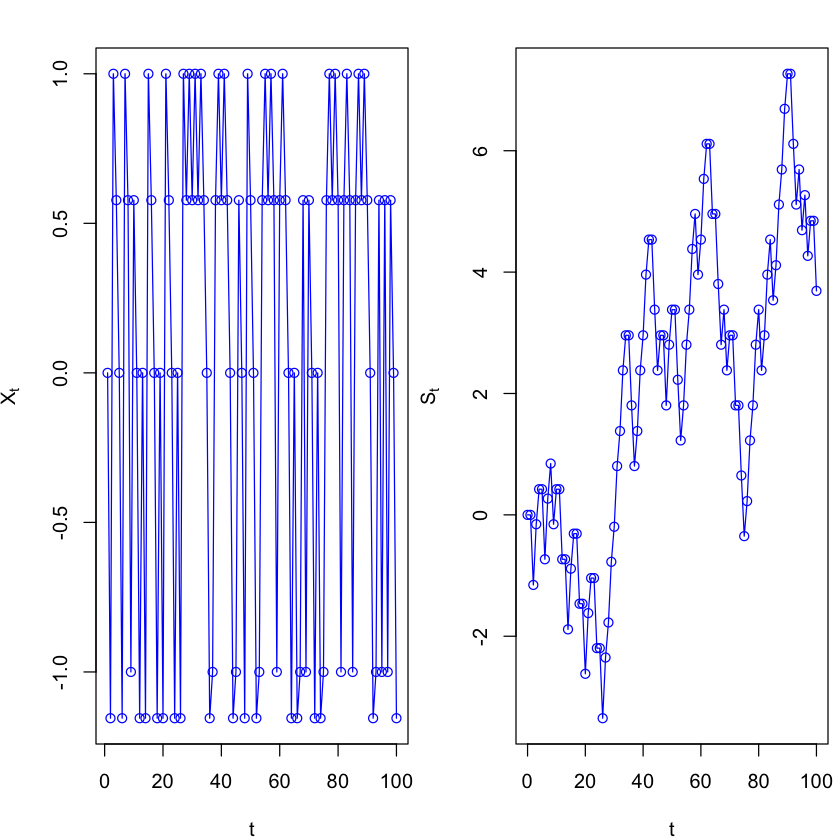

In [15]:
# Set the seed for reproducibility
set.seed(100)

# Plot layout: 1 row, 2 columns; background color white
par(mfrow = c(1, 2), bg = "white")

# Set plot margins: bottom, left, top, right
par(mar = c(4, 4, 2, 0.5))

# Define time vector t from 1 to 100
t <- seq(1, 100, by = 1)

# Define possible values for a base process
res <- c(-1, 0, 1)

# Sample random values (half length of t) from res
zt <- sample(res, length(t) / 2, replace = TRUE)

# Initialize empty vector for transformed values
xt <- c()

# Transform each z_t into two values:
# First: z_t itself Second: sqrt(3)*z_t^2 - 2/sqrt(3)
for (i in seq_along(zt)) {
  xt <- c(xt, c(zt[i], sqrt(3) * zt[i]^2 - 2 / sqrt(3)))
}

# Plot the transformed sequence X_t over time
plot(t, xt, type = "o", col = "blue", xlab = "t", ylab = expression(X[t]))

# Plot the cumulative sum of X_t, i.e., S_t = sum(X_1 to X_t)
plot(c(0, t), c(0, cumsum(xt)), type = "o", col = "blue", xlab = "t", ylab = expression(S[t]))


Figure 1.5: One realization of Example 1.9

If the stochastic behavior of all time series could be explained in terms of the white noise model,
classical statistical methods would suffice. 

Two ways of introducing serial correlation and more
smoothness into time series models are given in Examples 1.10 and 1.11.

**Example 1.10 (Moving Averages Smoother).**  
This is an essentially nonparametric method for trend estimation. It takes averages of observations around $t$; i.e., it smooths the series. For example, let  
$$
X_t = \frac{1}{3}(W_{t-1} + W_t + W_{t+1}), \tag{1.2}
$$  
which is a three-point moving average of the white noise series $W_t$. See Figure 1.9 for a realization.  

Inspecting the series shows a smoother version of the first series, reflecting the fact that the slower oscillations are more apparent and some of the faster oscillations are taken out.


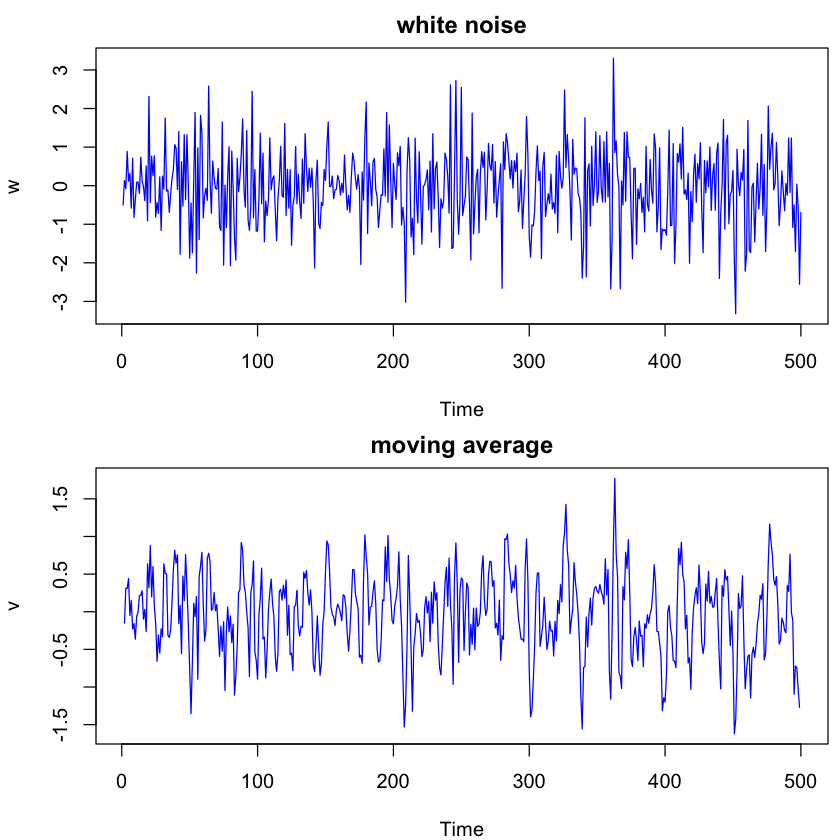

In [18]:
# Set the seed for reproducibility
set.seed(100)

# Generate 500 standard normal (N(0,1)) random variables = white noise
w <- rnorm(500, 0, 1)

# Apply a centered moving average filter of order 3:
# This averages each point with its neighbors (symmetric filter)
v <- filter(w, sides = 2, rep(1 / 3, 3))

# Set up 2 plots vertically, with white background
par(mfrow = c(2, 1), bg = "white")
par(mar = c(4, 4, 2, 0.5)) # margin settings: bottom, left, top, right

# Plot the white noise time series
plot.ts(w, main = "white noise", col = "blue")

# Plot the smoothed version (moving average)
plot.ts(v, main = "moving average", col = "blue")



Figure 1.6: Gaussian white noise series (top) and three-point moving average of the Gaussian white
noise series (bottom).

**Example 1.11 (AR(1) Model — Autoregression of Order 1).**  
Let  
$$
X_t = 0.6 X_{t-1} + W_t \tag{1.3}
$$  
where $W_t$ is a white noise series. It represents a regression or prediction of the current value $X_t$ of a time series as a function of the past value of the series.


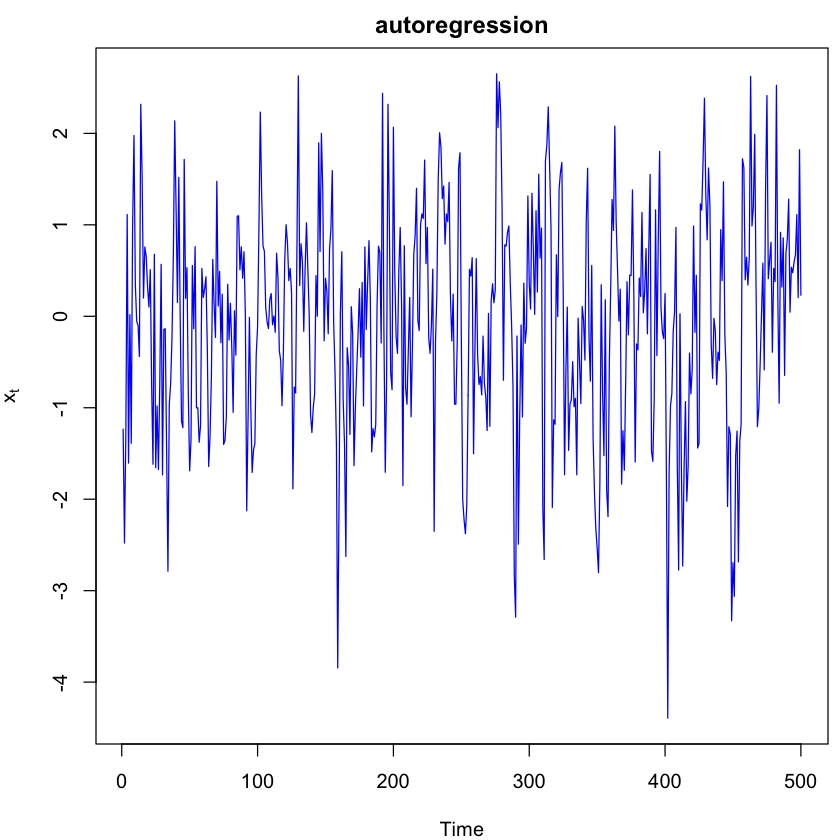

In [22]:
# Set seed for reproducibility
set.seed(100)

# Set plot margins and background color
par(mar = c(4, 4, 2, 0.5), bg = "white")

# Generate 550 standard normal random variables (white noise)
# Extra 50 values are used to "warm up" the recursive filter
w <- rnorm(550, 0, 1)

# Apply recursive filter: AR(1) process with coefficient 0.6
# filter = c(0.6) -> AR coefficient phi = 0.6
# method = "recursive" makes it use past values recursively:
# X_t = 0.6 * X_{t-1} + w_t
x <- filter(w, filter = c(0.6), method = "recursive")[-(1:50)]

# Plot the resulting time series
plot.ts(x, main = "autoregression", col = "blue", ylab = expression(x[t]))


Figure 1.7: A realization of autoregression model (1.3)

**Example 1.12 (Random Walk with Drift).**  
Let  
$$
X_t = \delta + X_{t-1} + W_t \tag{1.4}
$$  
for $t = 1, 2, \ldots$ with $X_0 = 0$, where $W_t$ is $\text{WN}(0, \sigma^2)$. The constant $\delta$ is called the **drift**, and when $\delta = 0$, $X_t$ is simply a **random walk** (see Example 1.7, and see Figure 1.8 for a realization).  

$X_t$ can also be rewritten as  
$$
X_t = \delta t + \sum_{j=1}^t W_j.
$$


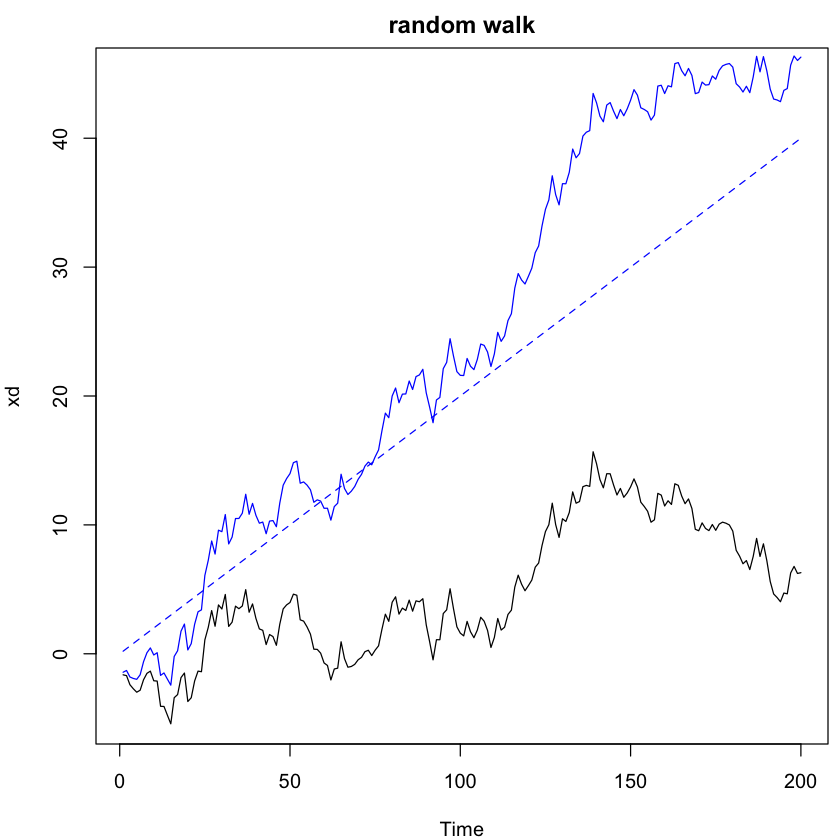

In [ ]:
# Set seed for reproducibility
set.seed(150)

# Generate 200 standard normal random variables (white noise)
w <- rnorm(200, 0, 1)

# Standard random walk: X_t = X_{t-1} + W_t
x <- cumsum(w)

# Add a drift of 0.2 to the noise
wd <- w + 0.2

# Random walk with drift: Xd_t = Xd_{t-1} + (W_t + 0.2)
xd <- cumsum(wd)

# Set plot margins and background
par(mar = c(4, 4, 2, 0.5), bg = "white")

# Plot random walk with drift
plot.ts(xd, ylim = c(-5, 45), main = "random walk", col = "blue")

# Add standard random walk as a line
lines(x)

# Add theoretical drift line: 0.2 * time (expected value of drift component)
lines(0.2 * (1:200), lty = "dashed", col = "blue")


**Figure 1.8:** Random walk, $\sigma = 1$, with drift $\delta = 0.2$ (upper jagged line), without drift, $\delta = 0$ (lower jagged line), and a straight line with slope $0.2$ (dashed line).